In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/content/insurance.csv")

In [4]:
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
data["age"].max()

64

In [10]:
col=["age"]

In [12]:
mean=data[col].mean()
mean

age    39.207025
dtype: float64

In [13]:
median=data[col].median()
median

age    39.0
dtype: float64

In [14]:
mode=data[col].mode()
mode

,age
0,18


In [15]:
std=data[col].std()
std

age    14.04996
dtype: float64

In [17]:
data["age"].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [18]:
IQR = data['age'].quantile(0.75)-data['age'].quantile(0.25)
IQR

24.0

In [19]:

lowerBound=data['age'].quantile(0.25)-(1.5*IQR)
lowerBound

-9.0

In [20]:
upperBound=data['age'].quantile(0.75)+(1.5*IQR)
upperBound

87.0

In [23]:
data['age']=np.where(data['age']>upperBound,upperBound,data['age'])
data['age']

0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1333    50.0
1334    18.0
1335    18.0
1336    21.0
1337    61.0
Name: age, Length: 1338, dtype: float64

In [24]:
import seaborn as sns

<Axes: ylabel='age'>

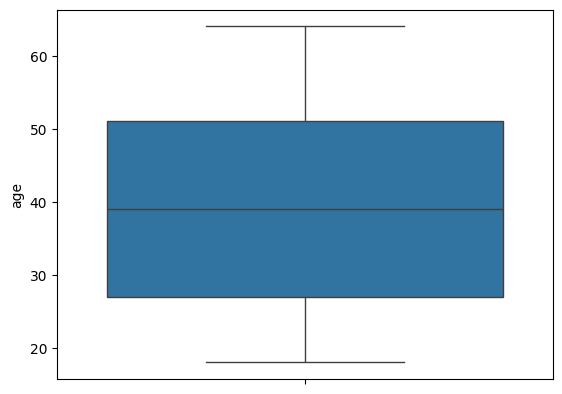

In [25]:
sns.boxplot(data['age'])

In [30]:
x=data.drop(columns="age",axis=1)
y=data["age"]
x
y

0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1333    50.0
1334    18.0
1335    18.0
1336    21.0
1337    61.0
Name: age, Length: 1338, dtype: float64

In [40]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder=LabelEncoder()

In [43]:
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])


In [47]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520


In [48]:
x=data.drop(columns="age",axis=1)
y=data["age"]
x
y

0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1333    50.0
1334    18.0
1335    18.0
1336    21.0
1337    61.0
Name: age, Length: 1338, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

age
19.0    59
18.0    51
20.0    26
46.0    26
48.0    26
24.0    25
47.0    25
21.0    25
52.0    25
22.0    25
45.0    24
30.0    24
55.0    23
33.0    23
31.0    23
34.0    23
40.0    23
25.0    23
53.0    23
51.0    23
27.0    22
28.0    22
58.0    22
54.0    22
38.0    22
49.0    21
50.0    21
29.0    20
62.0    20
42.0    20
43.0    20
64.0    20
56.0    20
35.0    20
32.0    20
23.0    19
26.0    19
57.0    19
60.0    19
61.0    18
59.0    18
36.0    17
37.0    17
41.0    17
39.0    17
44.0    17
63.0    16
Name: count, dtype: int64

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model=LinearRegression()

In [51]:
model.fit(x_train,y_train)

LinearRegression()

In [54]:
y_pred=model.predict(x_test)
y_pred


array([38.71745172, 36.8216139 , 42.60467526, 57.48182496, 35.32138541,
       38.16284009, 41.17466503, 23.69535501, 40.42302063, 26.93800931,
       34.09086095, 34.3879093 , 37.61031138, 39.13580031, 57.61511277,
       45.31778612, 33.95607472, 45.15372582, 43.31094146, 26.23563477,
       45.54441773, 32.48322404, 33.4538589 , 37.87306249, 36.03650571,
       43.98101905, 37.72847839, 44.96787677, 34.90716885, 27.17152437,
       33.16849248, 46.22844926, 49.71559284, 39.56897269, 32.83252344,
       35.48601042, 44.16348842, 39.32825645, 57.9629253 , 38.94364534,
       44.82915469, 62.46593866, 36.95252622, 43.29917642, 30.14886897,
       38.95811738, 40.32062147, 45.58559876, 43.54215025, 43.476335  ,
       46.26813636, 34.04631295, 37.88712662, 44.66611334, 58.91020441,
       43.34803399, 41.8838125 , 36.17292125, 37.28575523, 47.9555879 ,
       32.29448442, 29.81326549, 35.96270031, 32.50551861, 23.46834005,
       38.64708708, 49.17372842, 37.61441953, 39.61591334, 59.59

In [55]:
y_test

7       37.0
999     36.0
1209    59.0
491     61.0
625     29.0
        ... 
271     50.0
695     26.0
1039    19.0
323     57.0
835     42.0
Name: age, Length: 268, dtype: float64

In [59]:
from sklearn.metrics import r2_score

In [60]:
r2_score(y_pred,y_test)

-1.575221788157712

In [66]:
predict=model.predict([[1,22.705,0,0,1,21984.47061]])
predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54.15829804])